In [8]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
n_dots = 300
X = np.linspace(-2*np.pi, 2*np.pi, n_dots)
Y = np.cos(X) + 0.2*np.random.rand(n_dots) - 0.1
X = X.reshape(-1,1)
Y = Y.reshape(-1,1)

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [11]:
def polynomia_model(degree=1):
    polynomia_features = PolynomialFeatures(degree=degree,include_bias=False)
    linear_regression = LinearRegression(normalize=True)
    pipeline = Pipeline([('polynormial_features',polynomia_features),('linear_regression',linear_regression)])
    return pipeline

In [12]:
from sklearn.metrics import mean_squared_error
degrees = [2,3,5,10]
results = []

In [13]:
for d in degrees:
    model = polynomia_model(degree=d)
    model.fit(X,Y)
    train_score = model.score(X,Y)
    mse = mean_squared_error(Y,model.predict(X))
    results.append({'model':model,'degree':d,'score':train_score,'mse':mse})
    
for r in results:
    print('degree: {}; train_score: {}; mean squares error: {};'.format(r['degree'],r['score'],r['mse']))

degree: 2; train_score: 0.06274267405008904; mean squares error: 0.47423251464688654;
degree: 3; train_score: 0.06274568458552465; mean squares error: 0.4742309913792091;
degree: 5; train_score: 0.668363638958225; mean squares error: 0.16780103082767336;
degree: 10; train_score: 0.9942025253199163; mean squares error: 0.002933400380041094;


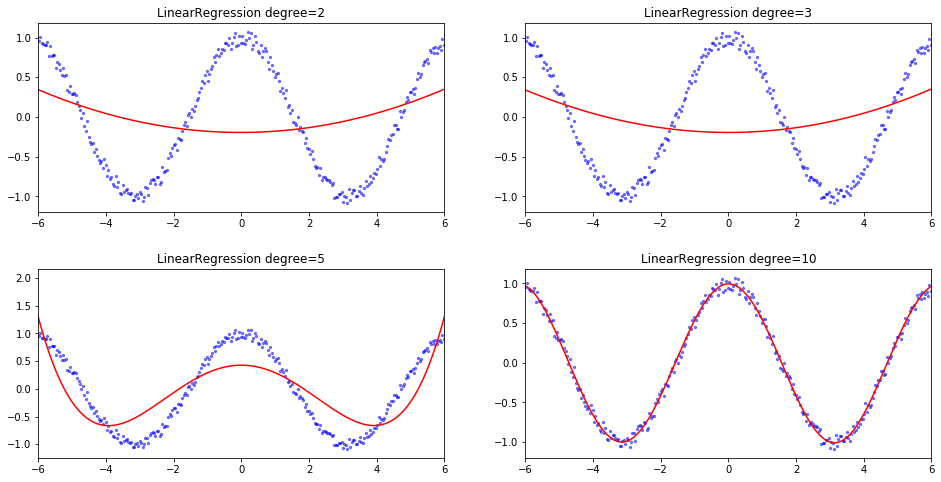

In [14]:
from matplotlib.figure import SubplotParams
plt.figure(figsize=(16,8),subplotpars=SubplotParams(hspace=0.3))
for i,r in enumerate(results):
    fig = plt.subplot(2,2, i+1)
    plt.xlim(-6,6)
    plt.title('LinearRegression degree={}'.format(r['degree']))
    plt.scatter(X,Y,s=5,c='b',alpha=0.5)
    plt.plot(X,r['model'].predict(X),'r-')